# **INSTALLING ALL THE REQUIRED LIBRARIES**

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install imutils

# IMPORTING ALL THE REQUIRED LIBRARIES

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import imutils

In [ ]:
import easyocr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the Image

In [204]:
img = cv2.imread('/content/drive/MyDrive/YOZUV/065.jpg')
#print(img)

# Converting the Image into the GRAY Scale FORMAT

In [176]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

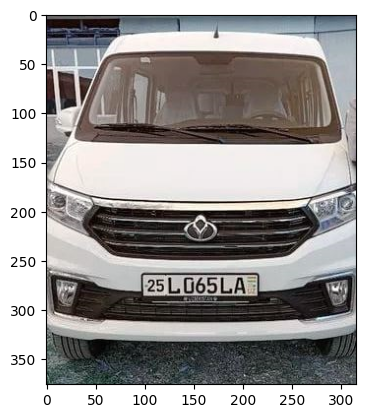

In [205]:
plt.imshow(img)

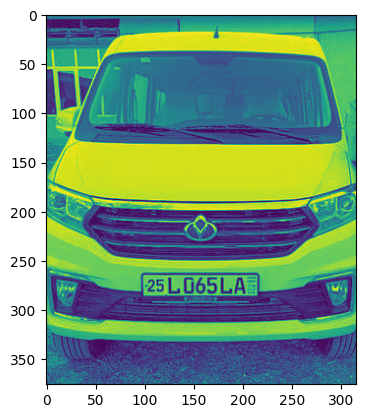

In [177]:
plt.imshow(gray)

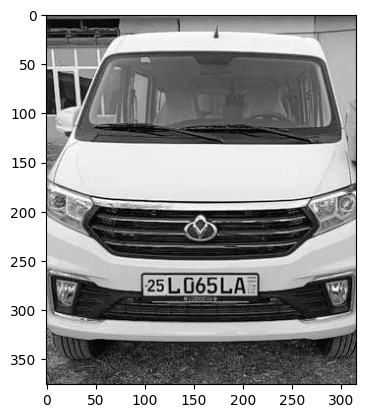

In [178]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# APPLYING FILTERING TO REMOVE THE NOISE FROM THE IMAGE, ALONG WITH THE EDGE DETECTION, WHICH ENABLES US TO FIND EDGES WITH IN THE IMAGE

In [179]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [180]:
edged = cv2.Canny(bfilter, 30, 200)

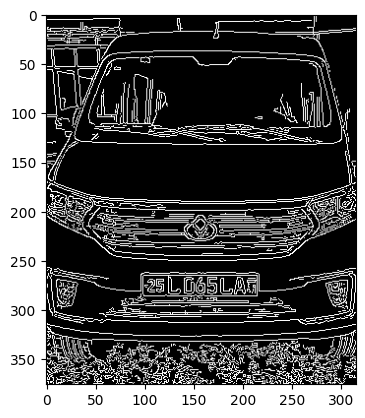

In [181]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [182]:
#  cv.CHAIN_APPROX_NONE gives (734 points) and  with cv.CHAIN_APPROX_SIMPLE (only 4 points)

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [183]:
# Simplifies how contonours are actually returned
contours = imutils.grab_contours(keypoints)

In [184]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [185]:
#print(contours)

In [186]:
location = None

for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [187]:
print(location)

[[[ 98 266]]

 [[ 99 286]]

 [[214 286]]

 [[214 265]]]


In [188]:
mask = np.zeros(gray.shape, np.uint8)

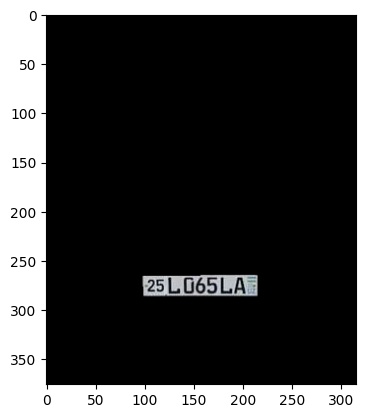

In [189]:
new_image = cv2.drawContours(mask, [location], 0, 255, -1)

new_image = cv2.bitwise_and(img, img, mask = mask)


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [190]:
(x, y) = np.where(mask == 255)

(x1, y1) = (np.min(x), np.min(y))

(x2, y2) = (np.max(x), np.max(y))

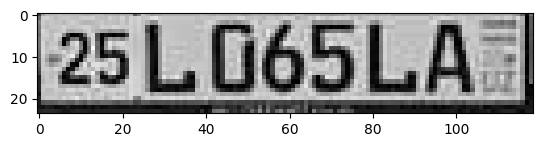

In [191]:
cropped_image = gray[x1:x2+3, y1:y2+3]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [192]:
reader = easyocr.Reader(['en'])

result = reader.readtext(cropped_image)

print(result)

[([[0, 0], [108, 0], [108, 24], [0, 24]], '25LO65LA', 0.5871902406837021)]


In [193]:
print(result[0][0])

[[0, 0], [108, 0], [108, 24], [0, 24]]


In [194]:
print(result[0][1])

25LO65LA


In [195]:
text = result[0][1]

font = cv2.FONT_HERSHEY_SIMPLEX

In [196]:
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)

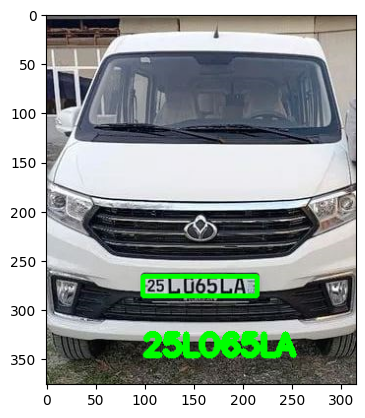

In [197]:
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))